In [68]:


!pip install pandas
!pip install openpyxl
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install mlxtend

In [69]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import mlxtend as mx
import seaborn as sb
from sklearn.metrics import precision_recall_fscore_support



## 1. Carga de los datos
Utilizamos la función read_csv Para cargar los datos desde un archivo CSV proporcionado. Luego, mostramos las primeras filas del dataframe y la información general para revisar los datos.A parte, eliminamos las columnas de project y Case ID ya que no aportaran información con el clasificador.

In [70]:
# Cargar los datos desde el archivo CSV proporcionado
data = pd.read_csv("TCGA.csv")

# Mostrar las primeras filas del dataframe y la información general para revisar los datos

data = data.drop(['Project','Case_ID'], axis=1)
data.head()

,Grade,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


## 2. Prepocesamiento de los datos
### Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos categóricos
Realizamos algunas transformaciones en los datos. Primero, convertimos todas las columnas a tipo 'category' utilizando el método astype. Luego, desechamos los datos tipo nan y dividimos las variables continuas en intervalos en base a su mediana. Mostramos los cambios en las primeras filas del dataframe para verificar.

In [71]:

# Convertir todas las columnas a tipo 'category'
data = data.astype('category')

# Asignar un número a cada una de las categorías utilizando codificación para cada columna categórica
for column in data.columns:
    data[column] = data[column].cat.codes

# Mostrar los cambios en las primeras filas del dataframe para verificar
data.head()

,Grade,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,2,410,5,5,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,1,2,223,4,5,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,2,174,1,5,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,126,2,5,0,0,0,1,1,...,1,1,1,1,1,1,1,1,0,1
4,1,2,104,2,5,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [72]:
data = data.dropna()
# Verificar la presencia de valores faltantes en el dataset
missing_values = data.isnull().sum()

# Mostrar los valores faltantes por columna
missing_values[missing_values > 0]

# Suponiendo que 'data' es tu DataFrame y ya está cargado
threshold_age = data['Age_at_diagnosis'].median()
threshold_primary_diagnosis = data['Primary_Diagnosis'].median()


# Función para aplicar el umbral y clasificar en 0 o 1
def apply_threshold(value, threshold):
    return 1 if value > threshold else 0

# Aplicar la función a cada columna
data['Age_at_diagnosis'] = data['Age_at_diagnosis'].apply(apply_threshold, args=(threshold_age,))
data['Primary_Diagnosis'] = data['Primary_Diagnosis'].apply(apply_threshold, args=(threshold_primary_diagnosis,))

# Ahora 'data' tiene las columnas binarizadas en 0 y 1


Mostramos si hay algun missing value y vemos las tablas de distribución que se dividen en categorias

In [73]:
# Calcular la distribución de cada variable categorizada
distribution_tables = {column: data[column].value_counts() for column in data.columns}

missing_values, distribution_tables

(Grade                0
 Gender               0
 Age_at_diagnosis     0
 Primary_Diagnosis    0
 Race                 0
 IDH1                 0
 TP53                 0
 ATRX                 0
 PTEN                 0
 EGFR                 0
 CIC                  0
 MUC16                0
 PIK3CA               0
 NF1                  0
 PIK3R1               0
 FUBP1                0
 RB1                  0
 NOTCH1               0
 BCOR                 0
 CSMD3                0
 SMARCA4              0
 GRIN2A               0
 IDH2                 0
 FAT4                 0
 PDGFRA               0
 dtype: int64,
 {'Grade': Grade
  1    499
  0    363
  Name: count, dtype: int64,
  'Gender': Gender
  2    499
  1    359
  0      4
  Name: count, dtype: int64,
  'Age_at_diagnosis': Age_at_diagnosis
  0    431
  1    431
  Name: count, dtype: int64,
  'Primary_Diagnosis': Primary_Diagnosis
  0    551
  1    311
  Name: count, dtype: int64,
  'Race': Race
  5    766
  3     59
  4     18
  2   

Dibujamos la matriz de confusión que nos deja ver que todas las variables aportan valor ya que hemos prescindido de aquellas que están demasiado correladas.

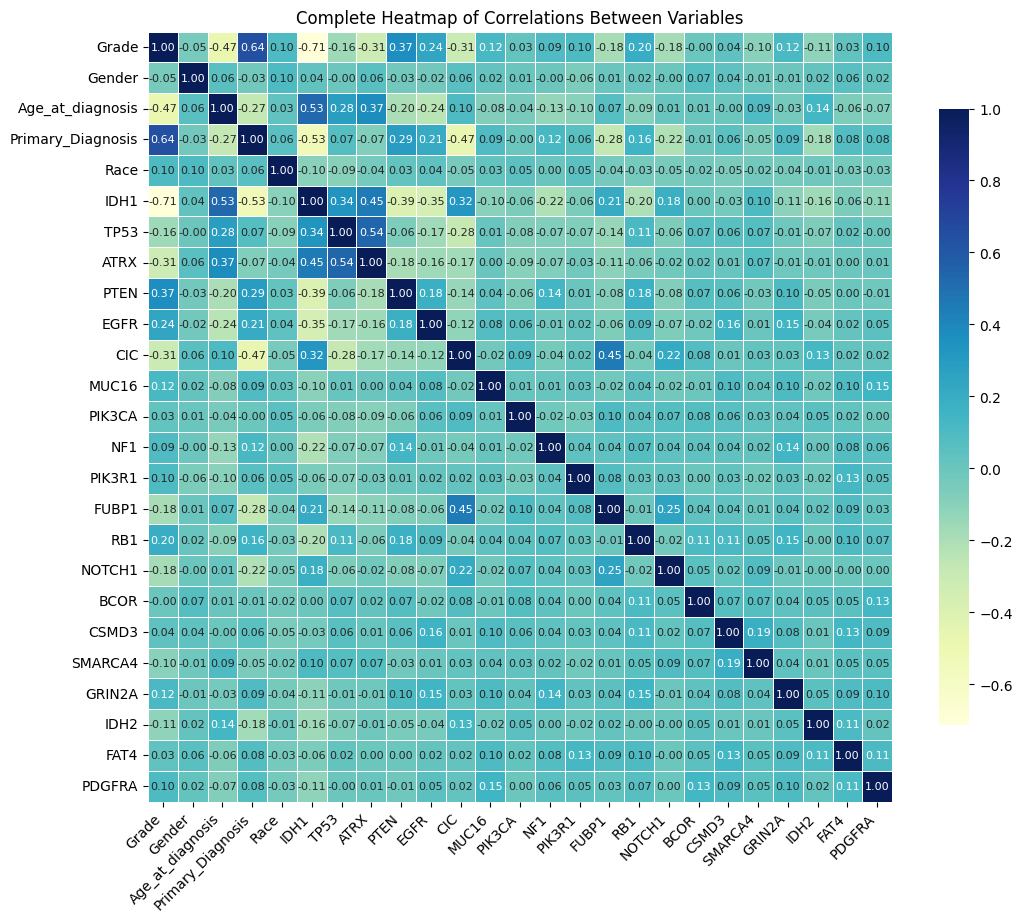

In [74]:
#Matriz de confusión
confusion_matrix = data.corr()
# Dibujar el mapa de calor mostrando todas las correlaciones
plt.figure(figsize=(12, 10))  # Tamaño ajustado para mejor visualización
heatmap_full = sb.heatmap(confusion_matrix, annot=True, fmt=".2f", linewidths=0.5,
                          cmap="YlGnBu", annot_kws={"size": 8},
                          cbar_kws={"shrink": .8})  # Ajustar tamaño de barra de color
heatmap_full.set_xticklabels(heatmap_full.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap_full.set_yticklabels(heatmap_full.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.title("Complete Heatmap of Correlations Between Variables")
plt.show()

## 3. Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10 clientes que no hayas usado para entrenar los modelos.

decidimos usar un clasificador KNN que tenga en cuenta 5 vecinos cercanos, de este modo tenemos un clasificador versatil y con capacidad de adaptación a bases de datos más ambiguas que esta.

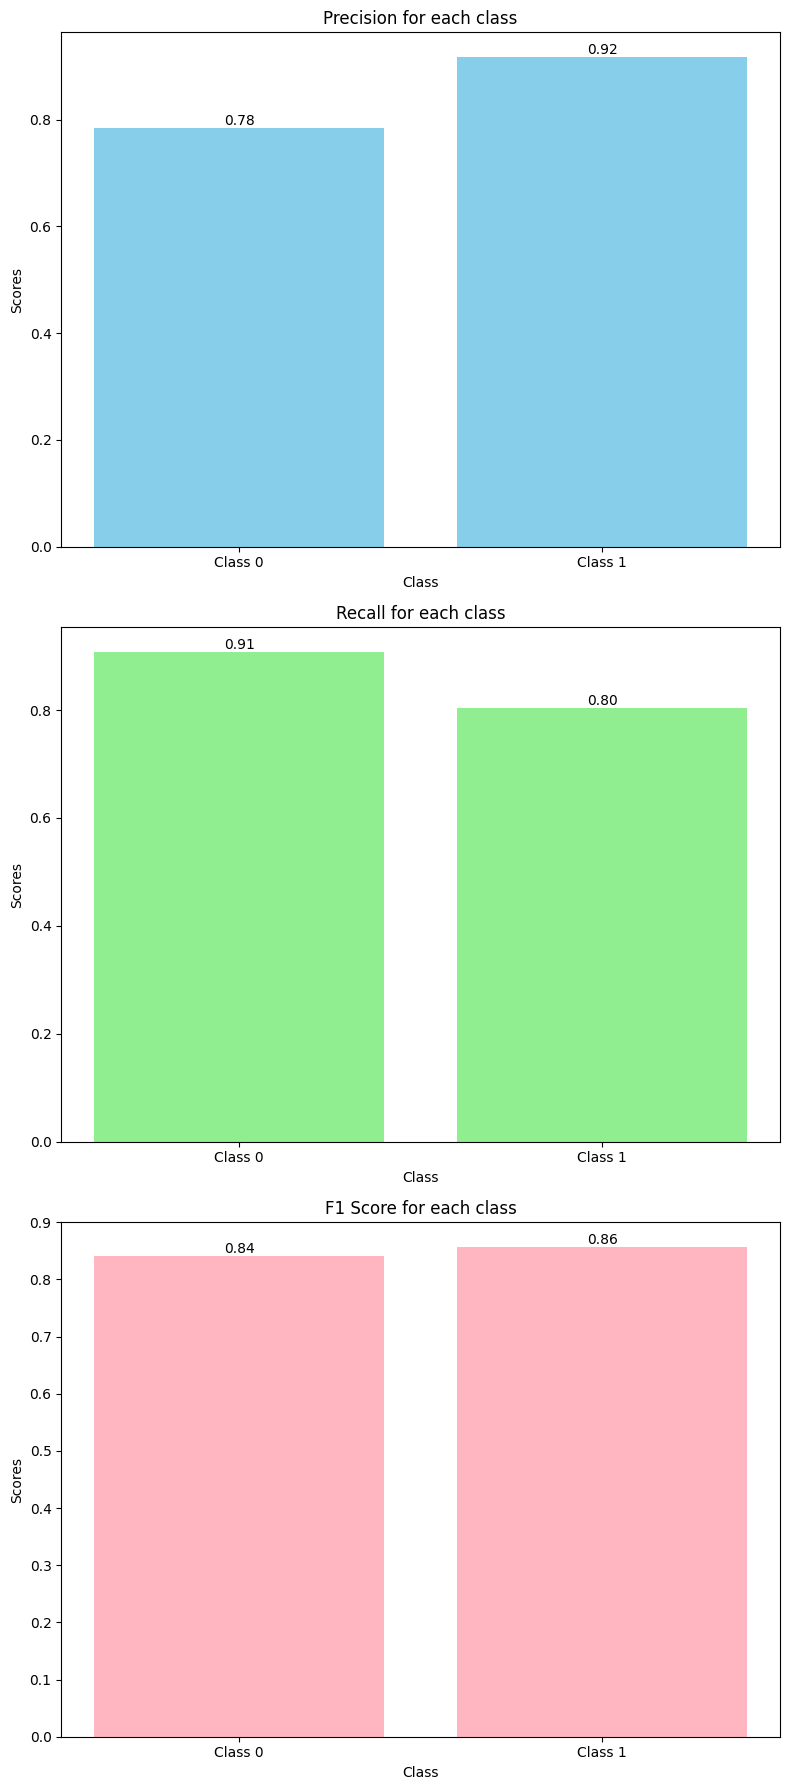

In [75]:

# Separar las características y la variable objetivo
X = data.drop('Grade', axis=1)
y = data['Grade']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test_scaled)


# Calcular la precisión y generar la matriz de confusión y el informe de clasificación
accuracy = accuracy_score(y_test, y_pred)

# Extraer métricas del informe de clasificación
metrics = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])
precision, recall, f1_score, support = metrics

# Definir etiquetas comunes
x_labels = ['Class 0', 'Class 1']
x = np.arange(len(x_labels))  # Localización de las etiquetas

# Función para crear gráficos
def create_metric_chart(ax, values, title, color):
    ax.bar(x, values, color=color)
    ax.set_xlabel('Class')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    # Mostrar valores en las barras
    for i, value in enumerate(values):
        ax.text(i, value, f"{value:.2f}", ha='center', va='bottom', color='black')

# Crear la figura y los ejes
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

# Crear gráficos individuales
create_metric_chart(axs[0], precision, 'Precision for each class', 'skyblue')
create_metric_chart(axs[1], recall, 'Recall for each class', 'lightgreen')
create_metric_chart(axs[2], f1_score, 'F1 Score for each class', 'lightpink')

plt.tight_layout()
plt.show()

**La precisión** para cada clase mide cuántas de las predicciones del modelo son correctas, es decir, mide la exactitud de las predicciones positivas del modelo para cada clase.

En la clase 0, el modelo tiene una precisión de 0.78, lo que significa que el 78% de las predicciones que el modelo hizo como clase 0 son correctas.
Y, en la clase 1, la precisión es aún mayor, con un 0.92, indicando que el 92% de las predicciones de la clase 1 son correctas.

**El recall** o sensibilidad mide la capacidad del modelo para identificar correctamente todos los casos relevantes dentro de una clase. Indica qué porcentaje de los casos reales de la clase fueron capturados por el modelo.

En la clase 0, el modelo tiene un recall de 0.91, lo que indica que identificó correctamente el 91% de todas las instancias reales de la clase 0.
Y, en la clase 1, el recall es de 0.80, lo que significa que capturó el 80% de todas las instancias reales de la clase 1.

**El F1 Score** combina la precisión y la sensibilidad en una sola métrica, equilibra ambos aspectos para proporcionar una visión general del rendimiento del modelo para cada clase. Es una media de la precisión y la sensibilidad.

En la clase 0, el modelo tiene un F1 score de 0.84, es decir, sugiere un equilibrio muy bueno entre la precisión y el recall para la clase 0. Y, en la clase 1, un F1 score de 0.86, que indica un equilibrio excelente.


In [76]:


# Seleccionar 10 clientes nuevos de X_test (solo para fines demostrativos, en la práctica se usarían datos no vistos)
X_new = X_test_scaled[:10]  # Asegúrate de tener al menos 10 datos en X_test_scaled

# Predecir la clase para los nuevos clientes
new_predictions = knn.predict(X_new)
print("Clases predichas para los nuevos clientes:", new_predictions)

# Error del modelo
model_error = 1 - accuracy
print("Error del modelo:", model_error)

Clases predichas para los nuevos clientes: [0 0 1 1 0 0 0 1 0 0]
Error del modelo: 0.1502890173410405


Por ultimo empleamos el módelo con 10 datos de forma que clasifican estos mismos entre la clase 0 y la clase 1 indicandonos un error de el 15% lo que es una gran noticia ya que es un porcentaje de acierto sumamente considerable.